# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')

In [3]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [4]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [5]:
# Following the regression equation, our dependent variable (y) is the price
y = data['price']
# Similarly, our independent variable (x) is the size
x = data['size']

### Explore the data

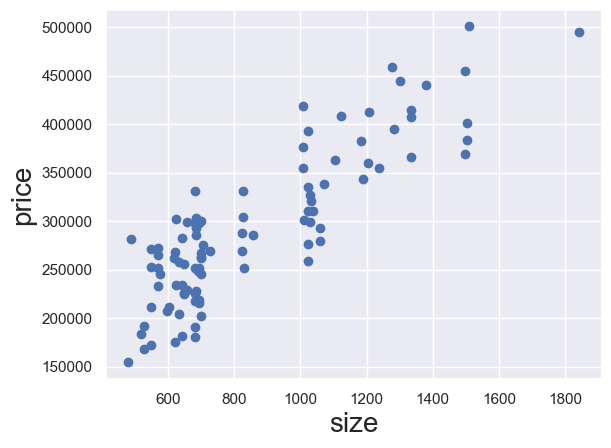

In [7]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x,y)
# Name the axises
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
# Show the plot
plt.show()

### Regression itself

In [8]:
# Add a constant. Essentially, we are adding a new column (equal in length to x), which consists only of 1s
x1 = sm.add_constant(x)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x1).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.13e-31
Time:                        08:52:49   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
print('regression coefficients:', results.params)


regression coefficients: const    101912.601801
size        223.178743
dtype: float64


### Plot the regression line on the initial scatter

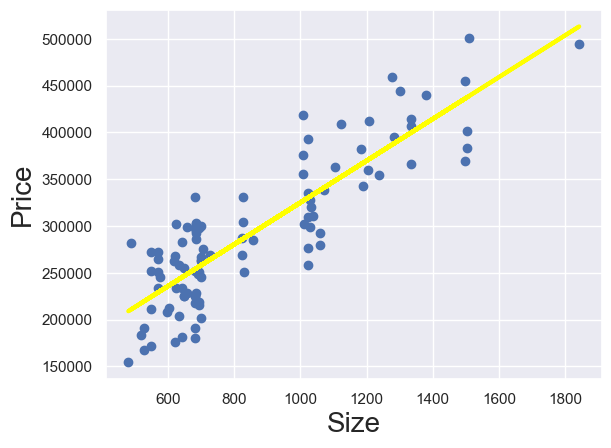

In [10]:
# Create a scatter plot
plt.scatter(x,y)
# Define the regression equation, so we can plot it later
yhat = 223.1787*x + 101912.6
# Plot the regression line against the independent variable (size)
fig = plt.plot(x,yhat, lw=3, c='yellow', label ='regression line')
# Label the axes
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()